In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t', quoting=3)

In [3]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
dataset.shape

(1000, 2)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
dataset.columns

Index(['Review', 'Liked'], dtype='object')

In [7]:
dataset.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [8]:
dataset.isnull().values.any()

False

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Liked', ylabel='count'>

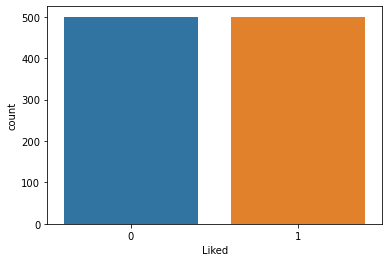

In [9]:
sns.countplot(dataset['Liked'])

In [10]:
(dataset.Liked==1).sum()

500

In [11]:
(dataset.Liked==0).sum()

500

In [12]:
dataset['Length']=dataset['Review'].apply(len)

In [13]:
dataset.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


<AxesSubplot:ylabel='Frequency'>

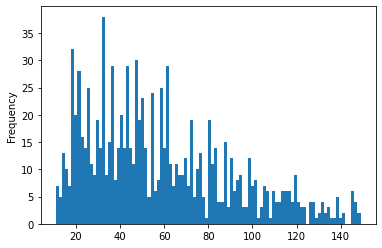

In [14]:
dataset['Length'].plot(bins=100,kind='hist')

In [15]:
dataset.Length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: Length, dtype: float64

In [16]:
dataset[dataset['Length']==149]['Review'].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [17]:
dataset[dataset['Length']==11]['Review'].iloc[0]

'DELICIOUS!!'

In [18]:
positive=dataset[dataset['Liked']==1]

In [19]:
negative=dataset[dataset['Liked']==0]

In [20]:
positive

,Review,Liked,Length
0,Wow... Loved this place.,1,24
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
8,The fries were great too.,1,25
9,A great touch.,1,14
...,...,...,...
899,"Overall, a great experience.",1,28
901,Their regular toasted bread was equally satisf...,1,97
907,The chips and sals a here is amazing!!!!!!!!!!...,1,55
909,This is my new fav Vegas buffet spot.,1,37


In [21]:
negative

,Review,Liked,Length
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
5,Now I am getting angry and I want my damn pho.,0,46
6,Honeslty it didn't taste THAT fresh.),0,37
7,The potatoes were like rubber and you could te...,0,111
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


In [22]:
dataset.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [23]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhave\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
corpus=[]
for i in range(0,1000):
    review=re.sub('^[a-zA-Z]',' ',dataset['Review'][i])
    review=review.lower()
    review=review.split()
    
    ps=PorterStemmer()
    all_stopwords=stopwords.words('english')
    all_stopwords.remove('not')
    
    review=[ps.stem(word) for word in review if not word in set(all_stopwords)]
    review=' '.join(review)
    corpus.append(review)

In [25]:
print(corpus)

['ow... love place.', 'rust not good.', 'ot tasti textur nasty.', 'top late may bank holiday rick steve recommend love it.', 'select menu great prices.', 'ow get angri want damn pho.', 'oneslti tast fresh.)', 'potato like rubber could tell made ahead time kept warmer.', 'fri great too.', 'great touch.', 'ervic prompt.', 'ould not go back.', 'cashier care ever say still end wayyy overpriced.', 'tri cape cod ravoli, chicken, cranberry...mmmm!', 'disgust pretti sure human hair.', 'shock sign indic cash only.', 'ighli recommended.', 'aitress littl slow service.', 'place not worth time, let alon vegas.', 'id not like all.', 'burritto blah!', 'food, amazing.', 'ervic also cute.', 'could care less... interior beautiful.', 'performed.', "hat' right....th red velvet cake.....ohhh stuff good.", '- never brought salad ask for.', 'hole wall great mexican street tacos, friendli staff.', 'ook hour get food 4 tabl restaur food luke warm, sever run around like total overwhelmed.', 'worst salmon sashim

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
cv = CountVectorizer(max_features=1500)

In [28]:
dataset.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [29]:
x=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:,1]

In [30]:
x.shape

(1000, 1500)

In [31]:
y.shape

(1000,)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [33]:
x_train.shape

(800, 1500)

In [34]:
y_train.shape

(800,)

In [35]:
x_test.shape

(200, 1500)

In [36]:
y_test.shape

(200,)

In [37]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(x_train,y_train)

GaussianNB()

In [38]:
y_pred=classifier_nb.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [40]:
accuracy_score(y_test,y_pred)

0.71

In [41]:
confusion_matrix(y_test,y_pred)

array([[50, 44],
       [14, 92]], dtype=int64)

In [42]:
from xgboost import XGBClassifier
classifier_xgb=XGBClassifier()
classifier_xgb.fit(x_train,y_train)

C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:14:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
y_pred=classifier_xgb.predict(x_test)

In [44]:
accuracy_score(y_test,y_pred)

0.735

In [45]:
confusion_matrix(y_test,y_pred)

array([[79, 15],
       [38, 68]], dtype=int64)